In [2]:
import os

def filter_and_relabel_yolo_dataset_strict(
    labels_dir: str,
    images_dir: str,
    target_category: int = 5,
    new_category: int = 0,
    image_extensions: tuple = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')
):
    """
    Processa arquivos de label e suas imagens correspondentes em duas etapas:
    1. Remove todas as linhas de categorias diferentes da target_category.
    2. Muda a target_category para a new_category nas linhas restantes.
    Deleta arquivos .txt e suas imagens se, após a filtragem, o .txt ficar vazio.

    Args:
        labels_dir (str): Caminho para o diretório contendo os arquivos .txt das labels.
        images_dir (str): Caminho para o diretório contendo as imagens.
        target_category (int): A categoria que você deseja manter e depois remapear.
        new_category (int): A nova categoria para substituir a categoria alvo.
        image_extensions (tuple): Tupla de extensões de imagem que devem ser consideradas.
    """
    if not os.path.isdir(labels_dir):
        print(f"Erro: O diretório de labels '{labels_dir}' não foi encontrado.")
        return
    if not os.path.isdir(images_dir):
        print(f"Erro: O diretório de imagens '{images_dir}' não foi encontrado.")
        return

    print(f"Iniciando processamento em duas etapas...")
    print(f"Diretório de Labels: {labels_dir}")
    print(f"Diretório de Imagens: {images_dir}")
    print(f"1. Filtrando: Apenas a categoria {target_category} será mantida em cada arquivo.")
    print(f"2. Remapeando: Categoria {target_category} será mudada para {new_category}.")
    print("Arquivos de label e imagens serão deletados se não contiverem a categoria alvo.")

    processed_labels_count = 0
    deleted_labels_count = 0
    deleted_images_count = 0

    # Lista todos os arquivos no diretório de labels
    label_files = [f for f in os.listdir(labels_dir) if f.endswith(".txt")]

    for filename in label_files:
        label_filepath = os.path.join(labels_dir, filename)
        
        # Deriva o nome base do arquivo (sem extensão) para encontrar a imagem
        base_name = os.path.splitext(filename)[0]
        
        # Tenta encontrar a imagem correspondente
        image_filepath = None
        for ext in image_extensions:
            potential_image_path = os.path.join(images_dir, base_name + ext)
            if os.path.exists(potential_image_path):
                image_filepath = potential_image_path
                break
        
        if image_filepath is None:
            print(f"Aviso: Não foi encontrada imagem correspondente para '{filename}'. Pulando este par.")
            continue # Pula para o próximo arquivo de label se não encontrar a imagem

        with open(label_filepath, 'r') as f:
            lines = f.readlines()

        temp_lines = []
        
        # --- ETAPA 1: FILTRAGEM ---
        # Mantém apenas as linhas com a categoria alvo
        for line in lines:
            parts = line.strip().split()
            if not parts:
                continue
            try:
                current_category = int(parts[0])
                if current_category == target_category:
                    temp_lines.append(line) # Mantém a linha
            except ValueError:
                print(f"Aviso: Linha inválida no arquivo {filename} durante filtragem: {line.strip()}. Ignorando.")
                continue

        # Verifica se o arquivo ficou vazio após a filtragem
        if not temp_lines:
            # Se o arquivo não contiver a categoria alvo, deleta label e imagem
            os.remove(label_filepath)
            deleted_labels_count += 1
            print(f"Deletado: '{filename}' (não continha a categoria {target_category}).")
            
            os.remove(image_filepath)
            deleted_images_count += 1
            print(f"Deletado: '{os.path.basename(image_filepath)}' (imagem correspondente).")
            continue # Pula para o próximo arquivo, pois este já foi tratado

        # --- ETAPA 2: REMAPEAMENTO ---
        # Se chegamos até aqui, o arquivo contém a categoria alvo.
        # Agora, remapeie a categoria e prepare para salvar.
        final_lines = []
        for line in temp_lines:
            parts = line.strip().split()
            # current_category já sabemos que é target_category, então apenas mudamos
            parts[0] = str(new_category)
            final_lines.append(" ".join(parts) + "\n")
        
        # Reescreve o arquivo com as linhas filtradas e remapeadas
        with open(label_filepath, 'w') as f:
            f.writelines(final_lines)
        processed_labels_count += 1
        print(f"Processado e atualizado: '{filename}' (categoria {target_category} -> {new_category} e outras removidas).")

    print("\n--- Resumo Final ---")
    print(f"Total de arquivos .txt processados e mantidos: {processed_labels_count}")
    print(f"Total de arquivos .txt deletados: {deleted_labels_count}")
    print(f"Total de imagens deletadas: {deleted_images_count}")
    print("Processamento concluído.")

# --- Como usar a função ---
# Ajuste estes caminhos para os seus diretórios reais.
# Exemplo de estrutura:
# /seu_projeto/
# ├── test/
# │   ├── images/
# │   │   ├── img1.jpg
# │   │   ├── img2.png
# │   │   └── img3.jpeg
# │   └── labels/
# │       ├── img1.txt
# │       ├── img2.txt
# │       └── img3.txt

labels_directory_path = 'datasets_fanta/validation/labels' 
images_directory_path = 'datasets_fanta/validation/images'

# Chame a função com a categoria alvo e a nova categoria
filter_and_relabel_yolo_dataset_strict(labels_directory_path, images_directory_path, 
                                       target_category=5, new_category=0)

Iniciando processamento em duas etapas...
Diretório de Labels: datasets_fanta/validation/labels
Diretório de Imagens: datasets_fanta/validation/images
1. Filtrando: Apenas a categoria 5 será mantida em cada arquivo.
2. Remapeando: Categoria 5 será mudada para 0.
Arquivos de label e imagens serão deletados se não contiverem a categoria alvo.
Deletado: '20231007_164222_jpg.rf.17b40d090fae0e40ea1b22e34f65e60a.txt' (não continha a categoria 5).
Deletado: '20231007_164222_jpg.rf.17b40d090fae0e40ea1b22e34f65e60a.jpg' (imagem correspondente).
Deletado: '2023-10-07-162006_jpg.rf.b2277e39593afd0503ec268f2392814e.txt' (não continha a categoria 5).
Deletado: '2023-10-07-162006_jpg.rf.b2277e39593afd0503ec268f2392814e.jpg' (imagem correspondente).
Processado e atualizado: '2023-10-08-085058_jpg.rf.8d4a1434a3ffe9b601f74fddc68b82a5.txt' (categoria 5 -> 0 e outras removidas).
Deletado: '2023-10-07-161756_jpg.rf.dcc9be394fcf8a73fbf89c8736271bc7.txt' (não continha a categoria 5).
Deletado: '2023-10-07-1

Arquivos dummy criados em: /Users/marcospaulocaetanomendesqueiroz/Documents/Pequi/data-generation/datasets_fanta/test
Plotando 5 imagens aleatórias com bounding boxes...


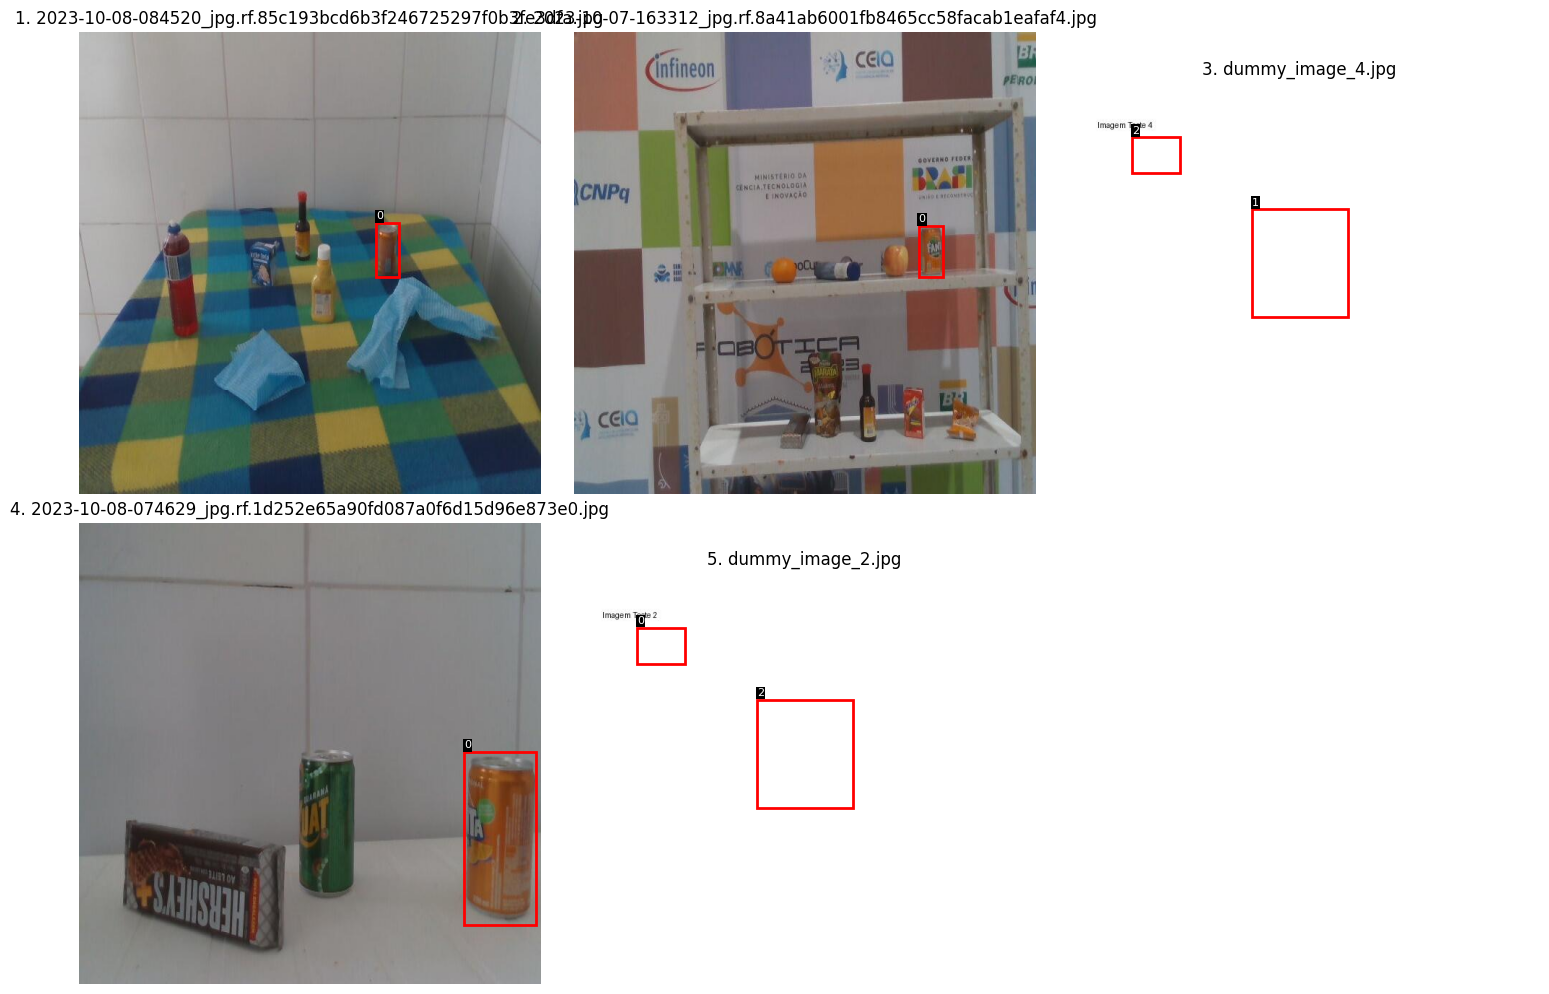

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os
import random
import numpy as np # Para lidar com arrays de imagem se necessário, embora PIL já baste

def plot_single_image_with_yolo_bboxes(
    ax: plt.Axes,
    image_path: str,
    label_path: str,
    title: str = ""
):
    """
    Carrega uma imagem e seu arquivo de label YOLO, e plota as bounding boxes em um Axes do Matplotlib.

    Args:
        ax (plt.Axes): O objeto Axes do Matplotlib onde a imagem e as bboxes serão plotadas.
        image_path (str): Caminho completo para o arquivo da imagem.
        label_path (str): Caminho completo para o arquivo .txt da label YOLO.
        title (str, optional): Título para o subplot. Defaults to "".
    """
    try:
        image = Image.open(image_path).convert("RGB")
    except Exception as e:
        print(f"Erro ao abrir a imagem '{image_path}': {e}")
        ax.set_title(f"Erro: {os.path.basename(image_path)}")
        ax.axis('off')
        return

    img_width, img_height = image.size

    # Exibir a imagem
    ax.imshow(image)
    ax.set_title(title)
    ax.axis('off') # Remover eixos para visualização de imagem

    # Carregar as labels
    try:
        with open(label_path, 'r') as f:
            yolo_lines = f.readlines()
    except FileNotFoundError:
        print(f"Aviso: Arquivo de label '{label_path}' não encontrado para a imagem '{os.path.basename(image_path)}'.")
        yolo_lines = []
    except Exception as e:
        print(f"Erro ao ler o arquivo de label '{label_path}': {e}")
        yolo_lines = []

    if not yolo_lines:
        print(f"Aviso: O arquivo de label '{os.path.basename(label_path)}' está vazio. Nenhuma bounding box para plotar.")

    # --- Cores para as Bounding Boxes ---
    # Matplotlib usa cores em formato (R, G, B) ou strings ('red', 'blue', etc.)
    bbox_color = 'red'
    text_color = 'white'
    text_background_color = 'black'

    # Plotar as Bounding Boxes
    for line_num, yolo_label_line in enumerate(yolo_lines):
        parts = yolo_label_line.strip().split()

        if len(parts) != 5:
            # print(f"Aviso: Linha {line_num+1} no label tem formato inválido: '{yolo_label_line.strip()}'. Ignorando.")
            continue

        try:
            class_id = int(parts[0])
            x_center, y_center, width, height = map(float, parts[1:])
        except ValueError:
            # print(f"Aviso: Linha {line_num+1} no label tem valores numéricos inválidos: '{yolo_label_line.strip()}'. Ignorando.")
            continue

        # Converter coordenadas YOLO para pixels
        # x_min, y_min são o canto superior esquerdo da bbox
        # width_pixel, height_pixel são largura e altura em pixels
        width_pixel = width * img_width
        height_pixel = height * img_height
        x_min = (x_center * img_width) - (width_pixel / 2)
        y_min = (y_center * img_height) - (height_pixel / 2)

        # Criar o patch do retângulo
        # Matplotlib Rectangle espera (x, y) do canto inferior esquerdo e depois width, height
        # Mas para imshow com origin='upper' (padrão), y_min já é o topo.
        rect = patches.Rectangle(
            (x_min, y_min), # (x,y) do canto superior esquerdo
            width_pixel,
            height_pixel,
            linewidth=2,
            edgecolor=bbox_color,
            facecolor='none'
        )
        ax.add_patch(rect)

        # Adicionar o ID da classe como texto
        text = str(class_id)
        text_x = x_min
        text_y = y_min - 5 # Posição do texto um pouco acima da bbox
        
        # Adicionar o texto
        ax.text(
            text_x,
            text_y,
            text,
            color=text_color,
            fontsize=8,
            bbox=dict(facecolor=text_background_color, edgecolor='none', pad=1)
        )

def plot_n_random_yolo_images(base_dataset_path: str, num_images: int = 5):
    """
    Seleciona N imagens aleatórias e plota-as com suas bounding boxes usando Matplotlib.

    Args:
        base_dataset_path (str): Caminho base para o diretório 'test'
                                 (ex: 'datasets_fanta/test').
        num_images (int): O número de imagens aleatórias a serem plotadas.
    """
    images_dir = os.path.join(base_dataset_path, "images")
    labels_dir = os.path.join(base_dataset_path, "labels")

    if not os.path.isdir(images_dir):
        print(f"Erro: O diretório de imagens '{images_dir}' não foi encontrado.")
        return
    if not os.path.isdir(labels_dir):
        print(f"Erro: O diretório de labels '{labels_dir}' não foi encontrado.")
        return

    image_files = [f for f in os.listdir(images_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    if not image_files:
        print(f"Erro: Nenhum arquivo de imagem encontrado em '{images_dir}'.")
        return

    # Garantir que não tentamos pegar mais imagens do que existem
    num_images_to_plot = min(num_images, len(image_files))
    
    # Selecionar imagens aleatórias (garantindo que sejam únicas)
    selected_image_filenames = random.sample(image_files, num_images_to_plot)

    # Configurar a figura e os subplots do matplotlib
    # Ajuste o layout da grade conforme o número de imagens (ex: 2x3 para 5 imagens)
    rows = int(np.ceil(num_images_to_plot / 3)) if num_images_to_plot > 0 else 0
    cols = 3 if num_images_to_plot > 0 else 0
    
    if rows == 0:
        print("Nenhuma imagem para plotar.")
        return

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    
    # Achatar o array de axes para iterar facilmente
    if num_images_to_plot == 1: # Se apenas uma imagem, axes não é um array
        axes = [axes]
    else:
        axes = axes.flatten()

    print(f"Plotando {num_images_to_plot} imagens aleatórias com bounding boxes...")

    for i, filename in enumerate(selected_image_filenames):
        image_path = os.path.join(images_dir, filename)
        base_name_without_ext = os.path.splitext(filename)[0]
        label_filename = base_name_without_ext + ".txt"
        label_path = os.path.join(labels_dir, label_filename)

        plot_single_image_with_yolo_bboxes(
            axes[i], # Passa o Axes específico para este subplot
            image_path,
            label_path,
            title=f"{i+1}. {os.path.basename(filename)}"
        )
    
    # Esconder subplots vazios se houver (ex: 6 slots para 5 imagens)
    for j in range(num_images_to_plot, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout() # Ajusta o layout para evitar sobreposição
    plt.show() # Exibir todas as imagens na mesma janela

# --- Executar a função ---
if __name__ == "__main__":
    # Ajuste este caminho para o diretório 'test' dentro de 'datasets_fanta'
    # Baseado na sua imagem, o caminho seria 'datasets_fanta/test'
    dataset_base_path = 'datasets_fanta/test'

    # Exemplo: Criar alguns arquivos dummy para testar se você não tiver o seu dataset
    # (Remova ou comente esta parte se você já tiver seus arquivos reais)
    dummy_test_dir = os.path.join(dataset_base_path)
    os.makedirs(os.path.join(dummy_test_dir, 'images'), exist_ok=True)
    os.makedirs(os.path.join(dummy_test_dir, 'labels'), exist_ok=True)

    for i in range(1, 7): # Cria 6 imagens e labels dummy para ter de onde escolher 5
        dummy_img_name = f"dummy_image_{i}.jpg"
        dummy_lbl_name = f"dummy_image_{i}.txt"
        
        dummy_img_path = os.path.join(dummy_test_dir, 'images', dummy_img_name)
        dummy_lbl_path = os.path.join(dummy_test_dir, 'labels', dummy_lbl_name)

        # Crie uma imagem branca
        img = Image.new('RGB', (640, 480), color=(255, 255, 255))
        draw_dummy = ImageDraw.Draw(img)
        draw_dummy.text((50, 50), f"Imagem Teste {i}", fill=(0,0,0))
        img.save(dummy_img_path)

        # Crie um arquivo de label (com algumas caixas aleatórias)
        with open(dummy_lbl_path, 'w') as f:
            f.write(f"{i % 3} 0.5 0.5 0.2 0.3\n") # Classe 0,1 ou 2 no centro
            if i % 2 == 0: # Algumas imagens com mais de uma bbox
                f.write(f"{ (i+1) % 3 } 0.2 0.2 0.1 0.1\n")
            if i % 3 == 0:
                f.write(f"{ (i+2) % 3 } 0.8 0.8 0.15 0.15\n")

    print(f"Arquivos dummy criados em: {os.path.abspath(dummy_test_dir)}")
    # --- Fim da criação de arquivos dummy ---

    # Chama a função para plotar 5 imagens aleatórias
    plot_n_random_yolo_images(dataset_base_path, num_images=5)